<img src="AV_Logo.png" style="width: 200px;height: 75px"/>

## Data Exploration and Visualization

### Table of Contents
* [Variable Identification](#Variable-identification)
* [Univariate Analysis](#Univariate-Analysis)
* [Bi-variate Analysis](#Bivariate-Analysis)

Remember the quality of your input, decides the quality of your output. So, once you have your business hypothesis ready, it makes sense to spend time and efforts here. As per my personal experience data exploration, cleaning and preparation of data can take up to 70% of your total project time.

Below are the steps involved to understand, clean and prepare your data for building your predictive model:

* Variable Identification
* Univariate Analysis
* Bi-variate Analysis
* Missing Values Treatment
* Outlier Treatment
* Variable Transformation
* Variable Creation

Finally, we will need to iterate over missing value treatment & outlier treatment multiple times before we come up with a refined model.

Today in this session, we will be covering Variable Identification, Univariate Analysis & Bi-variate analysis. 

### Variable identification

Example:- Suppose, we want to predict, whether students will play cricket or not (refer to below dataset).
Here you need to identify predictor variables, target variable, data type of variables and category of variables.

![Data_exploration_1](Data_exploration_1.png)

Let's first ponder upon what type of variables we have. As per our problem statement (i.e. whether the students will play cricket or not), the column "Play Cricket" fits the profile of being the target variable. All the rest of the columns would then be predictor variables.

Now let's take a look at what would be the datatypes of these columns. The column "Height" looks like it is composed mostly of numbers. So it is of numeric data type. The case is similar for "Weight" and "Prev_Exam_Marks". On the other hand, column "Gender" is mostly comprised of characters, so its data type is character.

Finally let's take a look at the variable categories. 

Looking at the gender column, it seems like there are only two possible values , "M" for male and "F" for female. Columns like these are said to be "categorical" columns. Whereas column "Height" has values between 160 and 180. So "height" column is called continuous column.


The table below summarizes this beautifully.



![Data_exploration_2](Data_exploration_2.png)

Let's solve the problem: Predict the count of bike rentals on hourly basis based on the environmental and seasonal settings. Load the data given as "train.csv" and analyze it

In [1]:
# to display graphs in the notebook itself
% pylab inline 
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
train_data = pd.read_csv('D:/dat1/train.csv')

IOError: File D:/dat1/train.csv does not exist

In [3]:
train_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Exercise**:

Q1. Write down the type of variable, data type and variable category for this dataset. 

There is an automated process to find the datatypes of variables as shown below:

In [4]:
train_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Normally, numeric columns in python are represented as "int32", "float32", "int64", "float64". Whereas character columns are represented as "object"

Note that even though "season" is "int32", it is actually a character column. The values of variables such as "spring" and "autumn" have been converted to "1" and "2". So you should prefer human intuition over python sometime!

To cope up with this, you have to check what are the individual values in each column. For example, let's print the unique values of season column

In [52]:
train_data['season'].unique()

array([1, 2, 3, 4], dtype=int64)

You can see that season has only 4 unique values.

**Exercise**:

Q1. As you can see above, the column "dteday" has been read as "object" datatype, but on the other hand it should be of datatype "datetime". How would you convert values of "object" datatype in column "dteday" to "datetime" datatype?

Hint: The answer is in [this article](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/)

### Univariate Analysis

In Univariate analysis stage, we explore variables one by one. Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous. Let’s look at these methods and statistical measures for categorical and continuous variables individually:

**Continuous Variables**:- In case of continuous variables, we need to understand the central tendency and spread of the variable. These are measured using various statistical metrics visualization methods as shown below:

![Data_exploration_3](Data_exploration_3.png)

In [6]:
train_data.describe() # get summary of numerical variables

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,13035.000000,13035.000000,13035.000000,13035.000000,13035.000000,13035.000000,13035.000000,13035.000000,13035.000000,13035.000000,13035.000000,13035.000000,13035.000000,13035.000000,13035.000000,13035.000000
mean,6518.000000,2.214806,0.336786,5.548293,11.550288,0.027388,3.002762,0.683698,1.425853,0.482389,0.463317,0.623282,0.196035,32.527733,135.249405,167.777138
std,3763.024714,1.052064,0.472629,3.297280,6.912504,0.163217,2.006777,0.465050,0.647530,0.191656,0.171546,0.199746,0.124183,46.655799,131.879162,160.786886
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3259.500000,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.318200,0.460000,0.104500,3.000000,30.000000,35.000000
50%,6518.000000,2.000000,0.000000,5.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.480000,0.469700,0.620000,0.194000,14.000000,103.000000,124.000000
75%,9776.500000,3.000000,1.000000,8.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.606100,0.790000,0.283600,42.000000,194.000000,246.000000
max,13035.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.980000,1.000000,1.000000,0.850700,367.000000,796.000000,957.000000


*describe()* function would provide count, mean, standard deviation (std), min, quartiles and max in its output 

Now as we are familiar with basic data characteristics, let us understand distribution of various variables. Let us start with numeric variables. 

A simple way to understand continuous numeric variables is by plotting a histogram. 

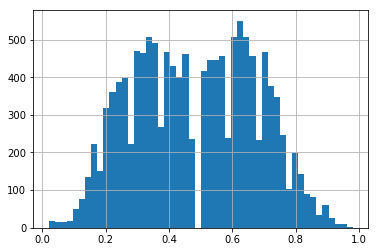

In [7]:
train_data['temp'].hist(bins=50)

As per the above plot you can see that more bikes are rented when the temperature is average. Most people won't rent a bike when its too hot or too cold outside.

Another way is to draw a boxplot and take your inferences. In simple words, Boxplot helps us check the distribution of data. Here's a [link](https://discuss.analyticsvidhya.com/t/understanding-and-interpreting-a-boxplots/1160/2?u=jalfaizy) if you want to know more on how to interpret a boxplot

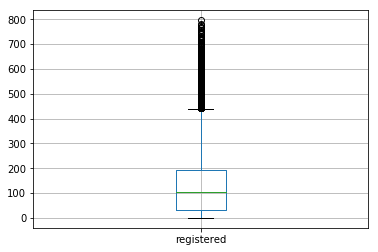

In [8]:
train_data.boxplot(column='registered')

From this plot, we understand that there are some values which don't lie in the normal range of values. This may be because during few hours the number of registered users is too high. 

**Categorical Variables**:- For categorical variables, we’ll use frequency table to understand distribution of each category. We can also read as percentage of values under each category. Bar chart can be used as visualization.

In [9]:
train_data['season'].value_counts() # frequency table

2    4409
1    3980
3    2512
4    2134
Name: season, dtype: int64

This table shows us that there are comparatively more values of seasons' 1 & 2 that seasons' 3 & 4. This may cause some bias in our analysis.

**Exercise**:

Q1. Plot histogram of humidity (a.k.a column "hum") with bin size as 100. 

Q2. Draw a boxplot of humidity and then segregate the plot by season

Note: Univariate analysis is also used to highlight missing and outlier values. In the upcoming part of this series, we will look at methods to handle missing and outlier values. 

Q3. Display the frequency table for 'yr' column

### Bivariate Analysis

Bi-variate Analysis finds out the relationship between two variables. Here, we look for association and disassociation between variables at a pre-defined significance level. We can perform bi-variate analysis for any combination of categorical and continuous variables. The combination can be: 

* Continuous & Continuous. 
* Categorical & Continuous 
* Categorical & Categorical

Different methods are used to tackle these combinations during analysis process.

Let’s understand the possible combinations in detail:

#### Continuous & Continuous

While doing bi-variate analysis between two continuous variables, we should look at **scatter plot**. It is a nifty way to find out the relationship between two variables. The pattern of scatter plot indicates the relationship between variables. The relationship can be linear or non-linear.

![Data_exploration_4](Data_exploration_4.png)

Scatter plot shows the relationship between two variable but does not indicates the strength of relationship amongst them. 

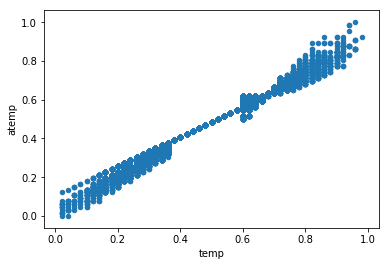

In [10]:
train_data.plot.scatter('temp', 'atemp')

This plot suggests a string positive correlation between "temp" and "atemp"

To find the strength of the relationship, we use Correlation. Correlation varies between -1 and +1.

    -1: perfect negative linear correlation
    +1:perfect positive linear correlation and 
    0: No correlation

In [11]:
train_data.temp.corr(train_data.atemp)

0.99186733492139112

Here we find that "temp" and "atemp" are **highly** positively correlated

#### Categorical & Continuous

While exploring relation between categorical and continuous variables, we can draw box plots for each level of categorical variables. If levels are large in number, it will show the statistical significance. 

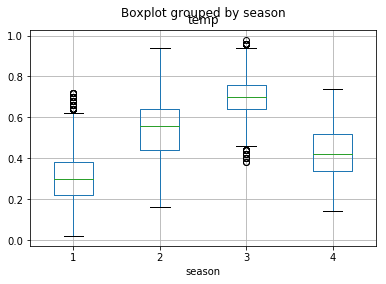

In [12]:
train_data.boxplot(column='temp', by='season')

The above plot shows that temperature is generally highest in season 3 and lowest in season 1. So probably season 2 and 3 would be more favorable for biking.

To look at the statistical significance we can perform Z-test, T-test or ANOVA.

#### Categorical & Categorical

To find the relationship between two categorical variables, we can use following methods:


* Pivot table
* Stacked Bar Chart: 

#### Pivot Table
We can start analyzing the relationship by creating a pivot table. The rows represents the category of one variable and the columns represent the categories of the other variable. We show an aggregation of observations available in each combination of row and column categories. This aggregation can be like a sum of values, or mean of them.

In [51]:
train_data.pivot_table(values='cnt', index='hr', columns='workingday', aggfunc='mean')

workingday,0,1
hr,,
0,79.732558,32.461126
1,60.482558,15.051075
2,47.429412,8.005479
3,23.441176,4.525714
4,7.213018,4.707736
5,7.597561,20.726542
6,16.923977,89.077540
7,38.445087,252.385027
8,92.427746,418.442359


This is a bit less intuitive to understand. Lets represent it in a different form.

#### Stacked Bar Chart
This method is more of a visual form of Pivot table.

In [49]:
temp = train_data.pivot_table(values='cnt', index='hr', columns='workingday', aggfunc='mean')

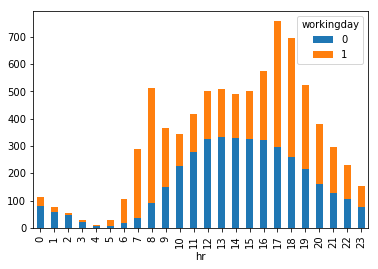

In [50]:
temp.plot(kind='bar', stacked=True)

What inference can we gain from this?

The plot shows an hourly distribution of count of rented bikes. It is then color coded with respect to the distribution of working vs non-working days. 

If you check the hourly overall distribution, you will see that people generally sleep during hour 0-6 and so not much count of rented bikes are there. Also, you can see spikes of rented bikes on working days. The plot shows a surge in count at hour 8 and then hour 17-18. This shows that people might be going/returning from work at that time.

**Exercise**:

Q1. Find the correlation between temperature and humidity ("temp" and "hum")?


Q2. Create a pivot table of month vs season with values as count of rented bikes aggregated by mean 

To deepen your concepts, take a different dataset ('winequality.csv') and do all of the steps you learnt today

That's all folks!
---------------